# Objective 1: Understand historical sales trends at different store locations.

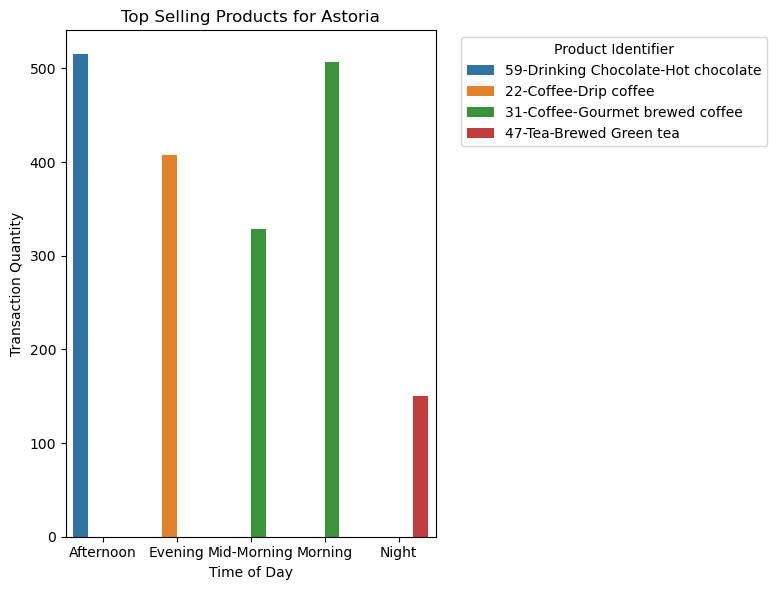

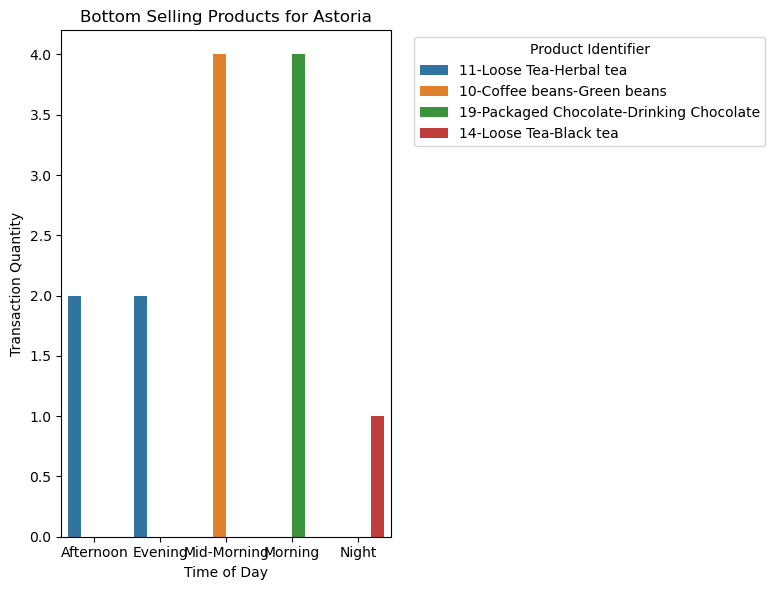

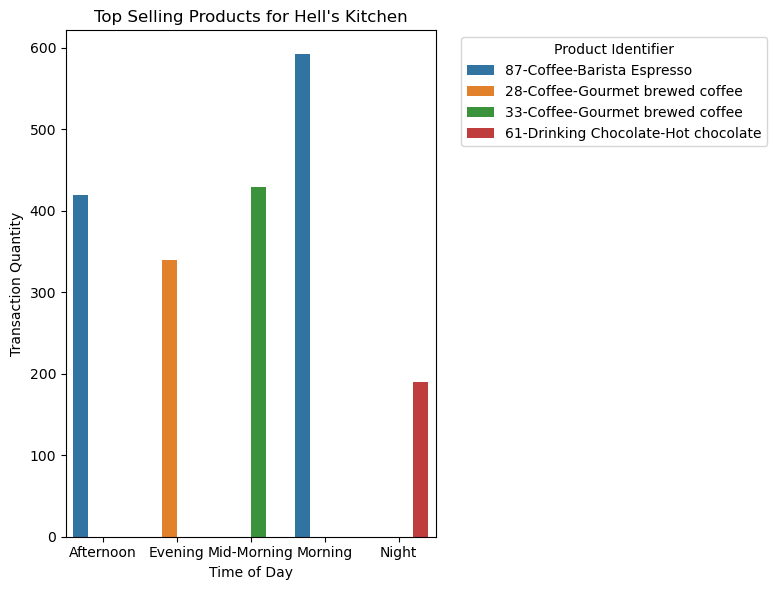

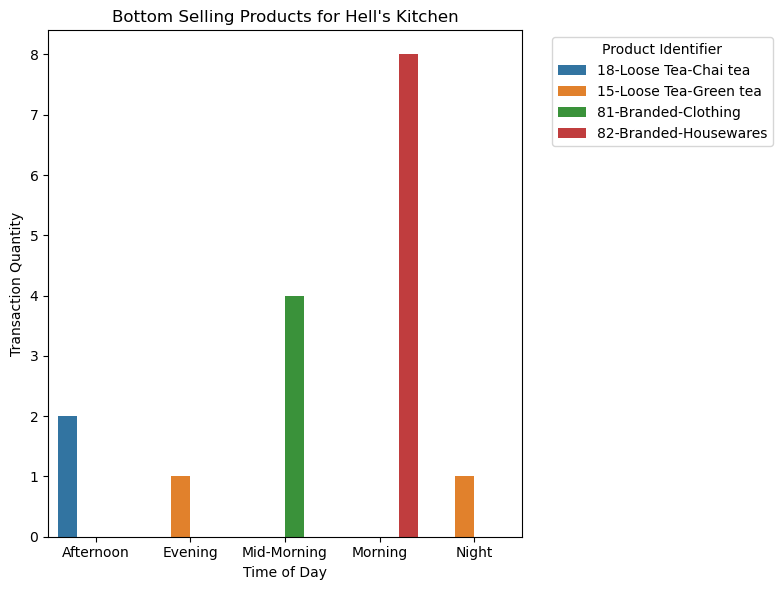

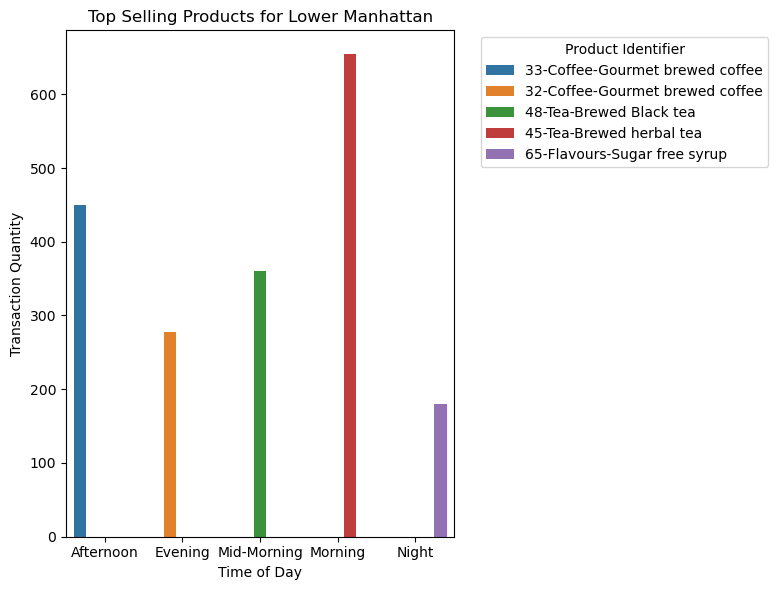

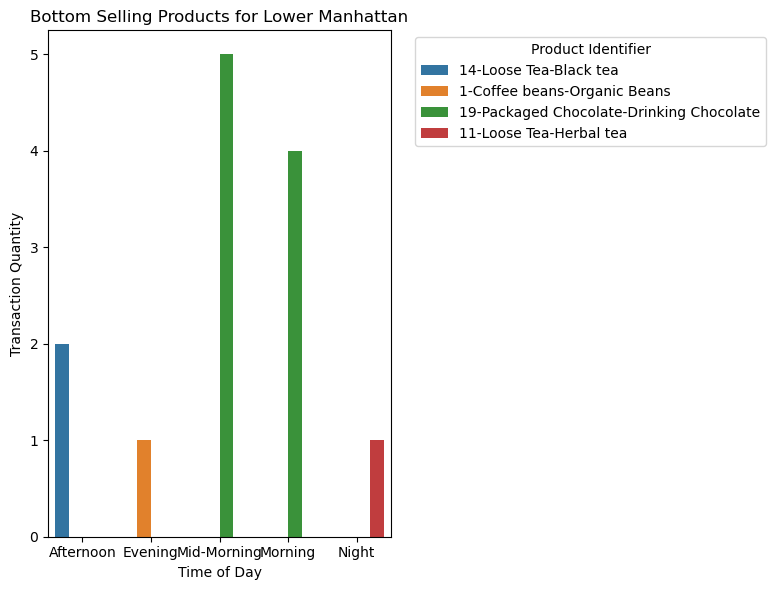

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Coffee_Shop_Sales_Dataset.csv")

# Convert Transaction Date and Transaction Time to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Transaction Time'] = pd.to_datetime(df['Transaction Time']).dt.time

# Extract time of the day
def get_time_of_day(hour):
    if 7 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 12:
        return 'Mid-Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 19:
        return 'Evening'
    else:
        return 'Night'

df['Time of Day'] = df['Transaction Time'].apply(lambda x: get_time_of_day(x.hour))

# Create a new column combining Product ID, Product Category, and Product Type
df['Product Identifier'] = df['Product ID'].astype(str) + '-' + df['Product Category'] + '-' + df['Product Type']

# Group the data by Store Location, Product Identifier, and Time of the Day
grouped_data = df.groupby(['Store Location', 'Product Identifier', 'Time of Day']).agg({'Transaction Quantity': 'sum'}).reset_index()

# Get unique product identifiers
unique_product_identifiers = grouped_data['Product Identifier'].unique()

# Create a dictionary to map product identifiers to product names
product_mapping = {product_id: df[df['Product Identifier'] == product_id]['Product Category'].iloc[0] for product_id in unique_product_identifiers}

# Loop through each store location
for store_location in grouped_data['Store Location'].unique():
    # Filter data for the current store location
    filtered_data = grouped_data[grouped_data['Store Location'] == store_location]
    
    # Get top and bottom-selling products for each time of the day
    top_selling_products = filtered_data.groupby('Time of Day').apply(lambda x: x.nlargest(1, 'Transaction Quantity')).reset_index(drop=True)
    bottom_selling_products = filtered_data.groupby('Time of Day').apply(lambda x: x.nsmallest(1, 'Transaction Quantity')).reset_index(drop=True)
    
    # Plot top-selling products
    plt.figure(figsize=(8, 6))
    sns.barplot(data=top_selling_products, x='Time of Day', y='Transaction Quantity', hue='Product Identifier')
    plt.title(f'Top Selling Products for {store_location}')
    plt.xlabel('Time of Day')
    plt.ylabel('Transaction Quantity')
    plt.legend(title='Product Identifier', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Plot bottom-selling products
    plt.figure(figsize=(8, 6))
    sns.barplot(data=bottom_selling_products, x='Time of Day', y='Transaction Quantity', hue='Product Identifier')
    plt.title(f'Bottom Selling Products for {store_location}')
    plt.xlabel('Time of Day')
    plt.ylabel('Transaction Quantity')
    plt.legend(title='Product Identifier', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Objective 2: Identify consistently underperforming store locations. 

Underperforming Stores:
    Store Location  Transaction Count
2  Lower Manhattan         262.563536


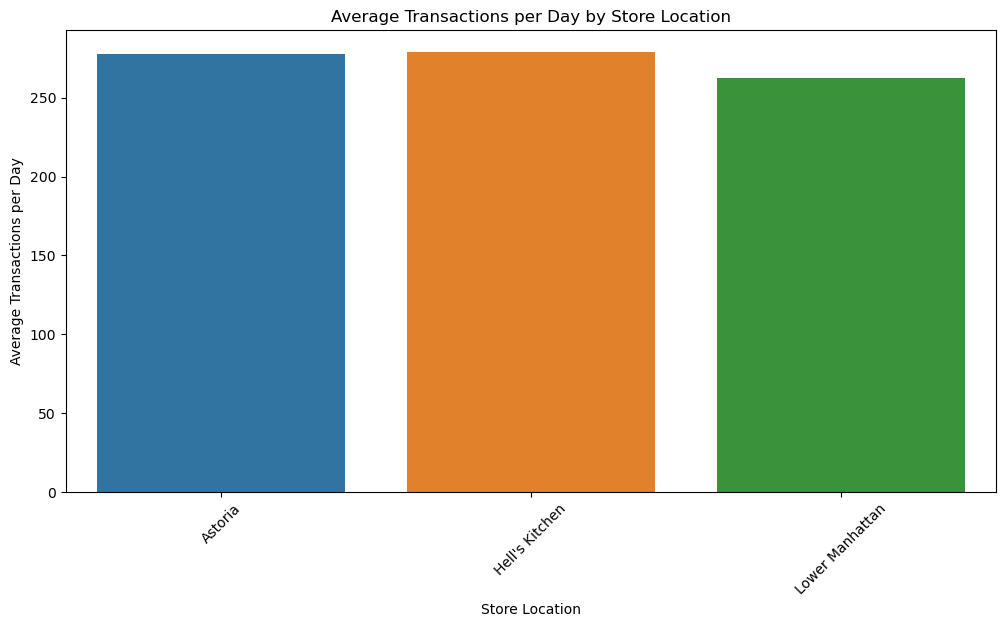

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Coffee_Shop_Sales_Dataset.csv")

# Convert Transaction Date and Time to datetime format
df['Transaction DateTime'] = pd.to_datetime(df['Transaction Date'] + ' ' + df['Transaction Time'])

# Aggregate transactions by store location, date, and time
transaction_counts = df.groupby(['Store Location', pd.Grouper(key='Transaction DateTime', freq='D')]).size().reset_index(name='Transaction Count')

# Calculate performance metrics (total transactions per day)
performance_metrics = transaction_counts.groupby('Store Location')['Transaction Count'].mean().reset_index()

# Define underperformance criteria (e.g., below average transactions per day)
underperformance_threshold = performance_metrics['Transaction Count'].quantile(0.25)  # Example: 25th percentile

# Identify underperforming stores
underperforming_stores = performance_metrics[performance_metrics['Transaction Count'] < underperformance_threshold]

# Output underperforming stores
print("Underperforming Stores:")
print(underperforming_stores)

# Visualize performance metrics
plt.figure(figsize=(12, 6))
sns.barplot(data=performance_metrics, x='Store Location', y='Transaction Count')
plt.title('Average Transactions per Day by Store Location')
plt.xticks(rotation=45)
plt.xlabel('Store Location')
plt.ylabel('Average Transactions per Day')
plt.show()

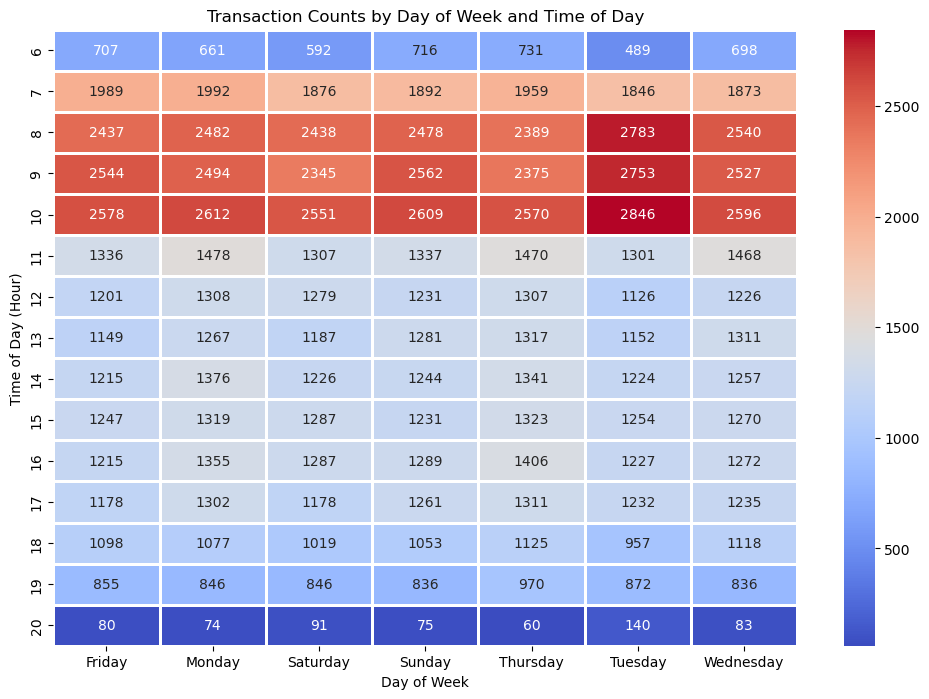

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Coffee_Shop_Sales_Dataset.csv")

# Convert Transaction Date and Time to datetime format
df['Transaction DateTime'] = pd.to_datetime(df['Transaction Date'] + ' ' + df['Transaction Time'])

# Extract day of the week and time of day
df['Day of Week'] = df['Transaction DateTime'].dt.day_name()
df['Time of Day'] = df['Transaction DateTime'].dt.hour

# Create a pivot table of transaction counts by day of the week and time of day for each store location
pivot_table = df.pivot_table(index='Time of Day', columns='Day of Week', values='Transaction ID', aggfunc='count')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', linecolor='white', linewidth=1, annot=True, fmt='g')
plt.title('Transaction Counts by Day of Week and Time of Day')
plt.xlabel('Day of Week')
plt.ylabel('Time of Day (Hour)')
plt.show()

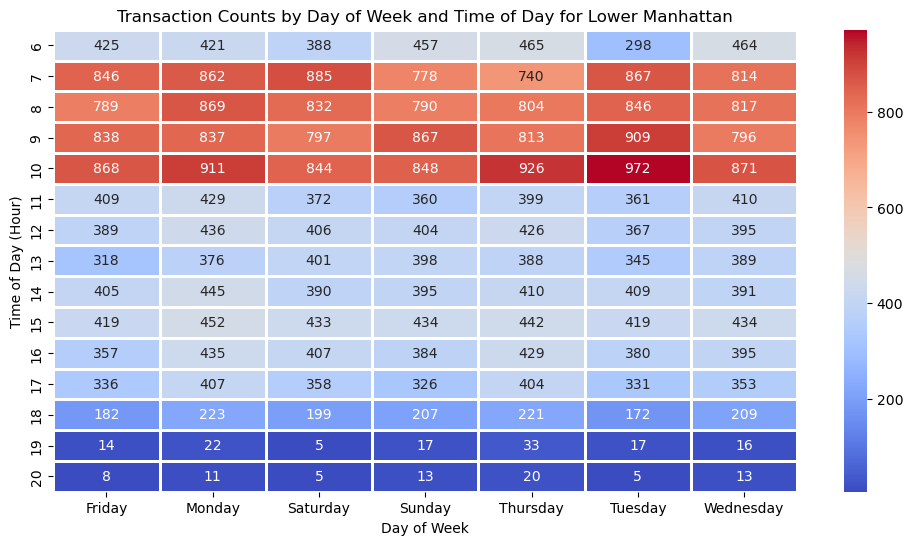

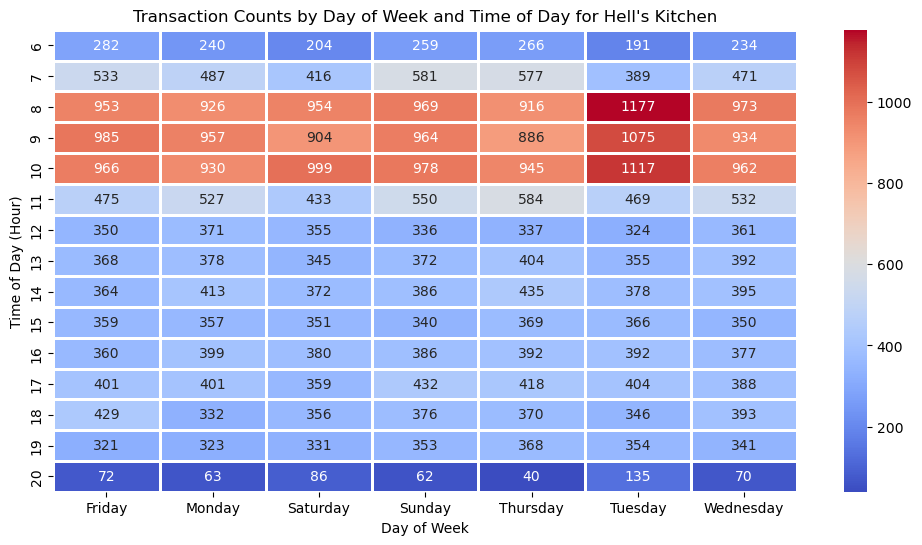

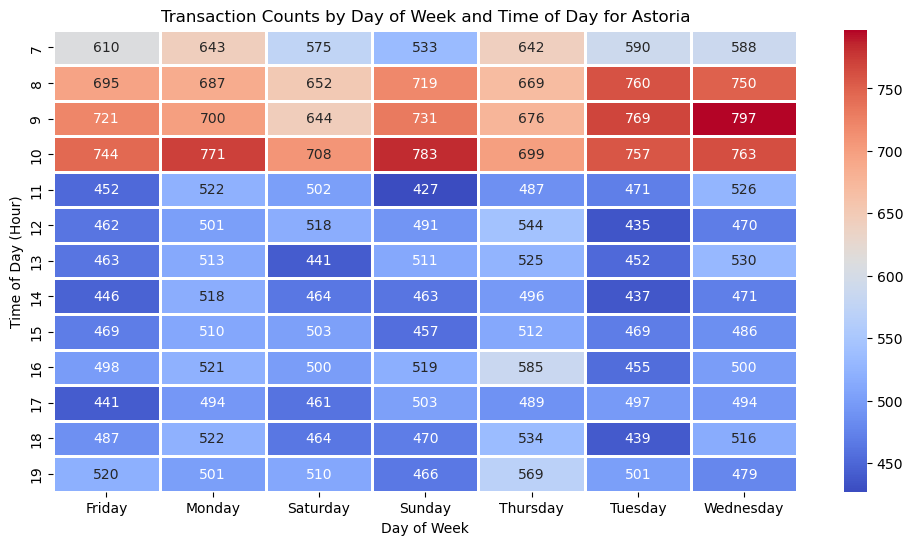

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Coffee_Shop_Sales_Dataset.csv")

# Convert Transaction Date and Time to datetime format
df['Transaction DateTime'] = pd.to_datetime(df['Transaction Date'] + ' ' + df['Transaction Time'])

# Extract day of the week and time of day
df['Day of Week'] = df['Transaction DateTime'].dt.day_name()
df['Time of Day'] = df['Transaction DateTime'].dt.hour

# Get unique store locations
store_locations = df['Store Location'].unique()

# Create a heatmap for each store location
for location in store_locations:
    # Filter data for the current store location
    location_df = df[df['Store Location'] == location]
    
    # Create a pivot table of transaction counts by day of the week and time of day
    pivot_table = location_df.pivot_table(index='Time of Day', columns='Day of Week', values='Transaction ID', aggfunc='count')

    # Create the heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_table, cmap='coolwarm', linecolor='white', linewidth=1, annot=True, fmt='g')
    plt.title(f'Transaction Counts by Day of Week and Time of Day for {location}')
    plt.xlabel('Day of Week')
    plt.ylabel('Time of Day (Hour)')
    plt.show()